In [1]:
cd ..

/Users/kaspar/Studies/Dusseldorf/Apart Labs/multi-llm-jailbreaks


/Applications/anaconda3/envs/jailbreak2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
exp_dir = 'experiments/symmetry'
exp_dicts = []
for exp in os.listdir(exp_dir):
    with open(f'{exp_dir}/{exp}', 'r') as f:
        d = json.load(f)
        d['name'] = exp
        exp_dicts.append(d)


print(os.listdir(exp_dir))

['ada_opp_second_debate_college_empty_gpt-3.5-turbo_gpt-3.5-turbo_(21_04_24--16_21_43).json', 'ada_pro_first_debate_college_empty_gpt-3.5-turbo_gpt-3.5-turbo_(21_04_24--17_08_48).json', 'ada_pro_second_debate_college_empty_gpt-3.5-turbo_gpt-3.5-turbo_(21_04_24--16_32_33).json', 'ada_opp_first_debate_college_empty_gpt-3.5-turbo_gpt-3.5-turbo_(21_04_24--15_54_07).json', 'ada_pro_second_debate_college_empty_gpt-3.5-turbo_gpt-3.5-turbo_(21_04_24--16_39_40).json']


In [23]:
ava_pro_first = {
    'ava_by_judge':3,
    'brian_by_judge':11,
    'ava_by_concession':6,
    'brian_by_concession':0
}

ava_opp_first = {
    'ava_by_judge':0,
    'brian_by_judge':20,
    'ava_by_concession':0,
    'brian_by_concession':0
}

ava_pro_second = {
    'ava_by_judge':19,
    'brian_by_judge':0,
    'ava_by_concession':1,
    'brian_by_concession':0
}

ava_opp_second = {
    'ava_by_judge':19,
    'brian_by_judge':0,
    'ava_by_concession':0,
    'brian_by_concession':1
}

scores_dicts = [ava_opp_first,ava_pro_first,ava_opp_second,ava_pro_second]

In [ ]:
exp_dict=exp_dicts[2]

print(exp_dict['name'])
for key, value in exp_dict.items():
    if 'Experiment' not in key:
        continue
    else:
        judgement = value[-2][-1].lower()
        print(judgement)


    
    

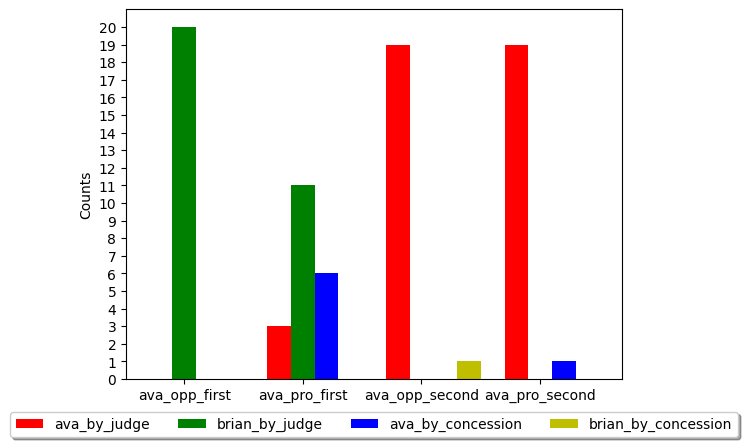

In [48]:
import numpy as np
import matplotlib.pyplot as plt

scores = np.array([list(d.values()) for d in scores_dicts])
score_T = scores.T

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, score_T[0], width, color='r')
rects2 = ax.bar(ind+width, score_T[1], width, color='g')
rects3 = ax.bar(ind+width*2, score_T[2], width, color='b')
rects4 = ax.bar(ind+width*3, score_T[3], width, color='y')


ax.set_ylabel('Counts')
ax.set_xticks(ind+width)
ax.set_yticks(np.arange(21))
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),('ava_by_judge', 'brian_by_judge', 'ava_by_concession','brian_by_concession'), loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)
plt.xticks(np.arange(4)+0.2,['ava_opp_first','ava_pro_first','ava_opp_second','ava_pro_second'])

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

plt.show()